## This file contains:
1. **Full Dataset load and preprocessing**
2. **Graph Construction**
3. **Fine Tuned Greedy Modularity Maximization Model**
4. **Properties from the communities detected**
5. **Leader identification from the communities**
6. **Processing and creating leader_df csv file**


In [ ]:
# !pip install tensorflow
# !pip install wordcloud
# !pip install pycountry
# !pip install langdetect
# !pip install prettytable

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
import itertools
from itertools import combinations
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from collections import Counter
import nltk
from nltk.corpus import stopwords, words as nltk_words
from nltk.tokenize import word_tokenize
# from wordcloud import WordCloud
import matplotlib.cm as cm
import re
from nltk.stem import WordNetLemmatizer
import heapq
from tqdm import tqdm

# import pycountry
# from langdetect import detect
# from prettytable import PrettyTable

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# LOAD DATA FILES AND COMBINE

In [ ]:
# df = pd.read_csv('D:/21301648/tweets-1.csv')
# df1 = pd.read_csv('D:/21301648/tweets-2.csv')
# df2 = pd.read_csv('D:/21301648/tweets-3.csv')
# df3 = pd.read_csv('D:/21301648/tweets-4.csv')
# df4 = pd.read_csv('D:/21301648/tweets-5.csv')
# df5 = pd.read_csv('D:/21301648/tweets-6.csv')
# df6 = pd.read_csv('D:/21301648/tweets.csv')
# comb = [df, df1, df2, df3, df4, df5, df6]
# df = pd.concat(comb)
# print(df.shape)
# df.head(5)

In [ ]:
# shihab
# df = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-1.csv')
# df1 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-2.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-3.csv')
# df3 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-4.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-5.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-6.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets.csv')

# # raiyan
# # df = pd.read_csv('/content/drive/MyDrive/data/tweets.csv')
# # df1 = pd.read_csv('/content/drive/MyDrive/data/tweets-1.csv')
# # df2 = pd.read_csv('/content/drive/MyDrive/data/tweets-2.csv')
# # df3 = pd.read_csv('/content/drive/MyDrive/data/tweets-3.csv')
# # df4 = pd.read_csv('/content/drive/MyDrive/data/tweets-4.csv')
# # df5 = pd.read_csv('/content/drive/MyDrive/data/tweets-5.csv')
# # df6 = pd.read_csv('/content/drive/MyDrive/data/tweets-6.csv')

#Temp lab
# df = pd.read_csv('C:/Users/21301610/Downloads/code/user_profile.csv')

#temp user profile data friom my drive
df= pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/userprofiling.csv')

print(df.shape)

(253516, 13)


In [ ]:
df.head()

,Unnamed: 0,Retweets Received,Likes Received,Verified or Non-Verified,User Followers,User Following,Hour,Frequency,Tweet Type_encoded,Tweet Year,Tweet Month,Tweet Day,Tweet Hour
0,0,0,0.0,0,26,13,32.0,3,2,2022,9,16,17
1,1,0,0.0,0,26,13,32.0,3,2,2022,9,16,17
2,2,0,0.0,0,26,13,32.0,3,2,2022,9,16,17
3,3,0,0.0,0,73,401,32.0,2,0,2022,9,16,17
4,4,0,0.0,0,73,401,32.0,2,0,2022,9,16,17


In [ ]:
df.columns

Index(['Unnamed: 0', 'Retweets Received', 'Likes Received',
       'Verified or Non-Verified', 'User Followers', 'User Following', 'Hour',
       'Frequency', 'Tweet Type_encoded', 'Tweet Year', 'Tweet Month',
       'Tweet Day', 'Tweet Hour'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
columns_to_normalize = ['User Followers', 'User Following', 'Retweets Received', 'Likes Received']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Cyclical encoding for Hour and Tweet Hour
import numpy as np

def cyclical_encode(df, col):
  #0 is midnight 1 is end of next day-midnight
  # radian -0 is 12 of night sin pi-0 is noon, sin pi/2 is 1 6am
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col]/24)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col]/24)
    return df


df = cyclical_encode(df, 'Tweet Hour')

# Drop original Hour and Tweet Hour columns
df = df.drop(['Tweet Hour'], axis=1)

# Print sample of normalized data
df.head()



,Unnamed: 0,Retweets Received,Likes Received,Verified or Non-Verified,User Followers,User Following,Hour,Frequency,Tweet Type_encoded,Tweet Year,Tweet Month,Tweet Day,Tweet Hour_sin,Tweet Hour_cos
0,0,0.0,0.0,0,0.000004,0.000012,32.0,3,2,2022,9,16,-0.965926,-0.258819
1,1,0.0,0.0,0,0.000004,0.000012,32.0,3,2,2022,9,16,-0.965926,-0.258819
2,2,0.0,0.0,0,0.000004,0.000012,32.0,3,2,2022,9,16,-0.965926,-0.258819
3,3,0.0,0.0,0,0.000012,0.000371,32.0,2,0,2022,9,16,-0.965926,-0.258819
4,4,0.0,0.0,0,0.000012,0.000371,32.0,2,0,2022,9,16,-0.965926,-0.258819


In [ ]:
# prompt: drop two columns tweet year, tweet month from df

df.drop(['Tweet Year', 'Tweet Month'], axis=1, inplace=True)


                          Unnamed: 0  Retweets Received  Likes Received  \
Unnamed: 0                  1.000000           0.001373        0.000269   
Retweets Received           0.001373           1.000000        0.668015   
Likes Received              0.000269           0.668015        1.000000   
Verified or Non-Verified    0.005433           0.070335        0.168239   
User Followers              0.001687           0.224793        0.377505   
User Following              0.007218          -0.000319       -0.000103   
Hour                       -0.353002          -0.003480       -0.001480   
Frequency                  -0.008342          -0.006470       -0.010343   
Tweet Type_encoded          0.006506           0.026582        0.050842   
Tweet Day                  -0.475195          -0.003040       -0.003037   
Tweet Hour_sin             -0.174447           0.002266       -0.003119   
Tweet Hour_cos              0.205141          -0.006098       -0.005846   

                        

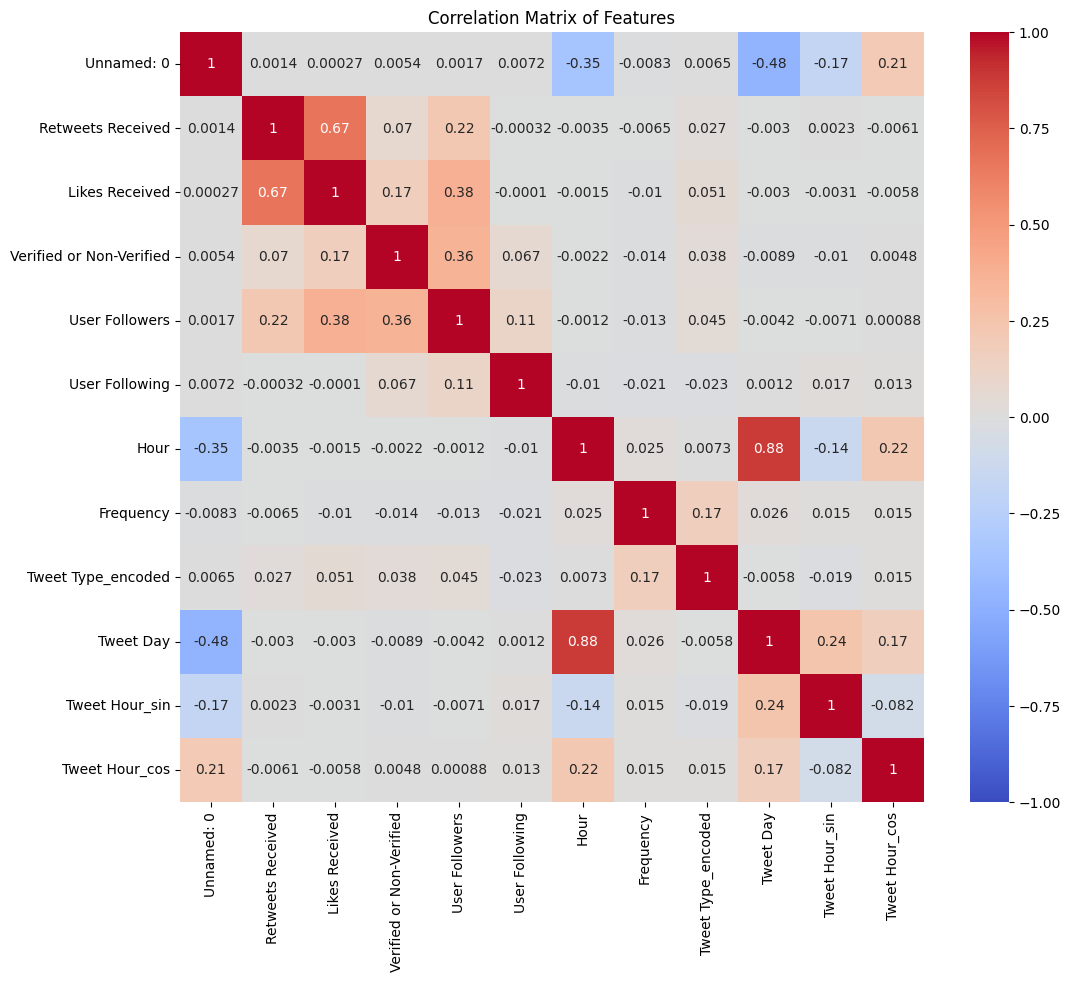

In [ ]:
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, you can visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df.drop('Unnamed: 0',axis=1,inplace=True)

X = df.drop('Frequency', axis=1)  # All columns except 'Frequency'
y = df['Frequency']

# Split the data based on the Hour column
X_train = X[X['Hour'] < 28]
y_train = y[X['Hour'] < 28]

X_test = X[(X['Hour'] >= 28) & (X['Hour'] <= 38)]
y_test = y[(X['Hour'] >= 28) & (X['Hour'] <= 38)]

# Print the shapes to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (180653, 10) (180653,)
Testing set shape: (72863, 10) (72863,)


In [ ]:

X_train.head()

,Retweets Received,Likes Received,Verified or Non-Verified,User Followers,User Following,Hour,Tweet Type_encoded,Tweet Day,Tweet Hour_sin,Tweet Hour_cos
40283,0.000000,0.000000,0,0.000649,0.000002,27.0,0,16,-2.588190e-01,-0.965926
40284,0.000217,0.000229,0,0.000681,0.004555,27.0,2,16,-2.588190e-01,-0.965926
40285,0.000000,0.000000,0,0.000681,0.004555,27.0,0,16,1.224647e-16,-1.000000
40286,0.000000,0.000000,0,0.000681,0.004555,27.0,0,16,1.224647e-16,-1.000000
40287,0.000000,0.000000,0,0.000681,0.004555,27.0,0,16,1.224647e-16,-1.000000


In [ ]:
# from sklearn.model_selection import train_test_split

# # Assuming your dataframe is named 'df'
# # And you've already normalized the relevant features

# # Split the data into training and testing sets
# X_train = df[df['Hour'] < 24][['Retweets Received', 'Likes Received',
#        'Verified or Non-Verified', 'User Followers', 'User Following', 'Hour',
#        'Tweet Type_encoded', 'Tweet Year', 'Tweet Month',
#        'Tweet Day', 'Tweet Hour' ]]

# y_train = df[df['Hour'] < 34]['Frequency']

# X_test = df[(df['Hour'] >=34 ) & (df['Hour'] <= 38)][['Retweets Received', 'Likes Received',
#        'Verified or Non-Verified', 'User Followers', 'User Following', 'Hour',
#        'Tweet Type_encoded', 'Tweet Year', 'Tweet Month',
#        'Tweet Day', 'Tweet Hour']]

# y_test = df[(df['Hour'] >= 34) & (df['Hour'] <= 38)]['Frequency']

In [ ]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(loss='squared_error', penalty='l2', learning_rate='constant', eta0=0.01, max_iter=10000)
model.fit(X_train, y_train)

SGDRegressor(learning_rate='constant', max_iter=10000)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R-squared: {test_r2:.4f}")

Training MSE: 213835960179233336066048.0000
Training RMSE: 462424004761.0346
Training R-squared: -204946308547675783168.0000
Test MSE: 1088905683772370577260544.0000
Test RMSE: 1043506436861.9729
Test R-squared: -863684191966828298240.0000


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_train_score = r2_score(y_train, lr_model.predict(X_train))
lr_test_score = r2_score(y_test, lr_model.predict(X_test))
lr_mse = mean_squared_error(y_test, lr_model.predict(X_test))
print("Linear Regression:")
print("Training R-squared:", lr_train_score)
print("Test R-squared:", lr_test_score)
print("Test MSE:", lr_mse)

# Ridge Regression
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
ridge_train_score = r2_score(y_train, ridge_model.predict(X_train))
ridge_test_score = r2_score(y_test, ridge_model.predict(X_test))
ridge_mse = mean_squared_error(y_test, ridge_model.predict(X_test))
print("\nRidge Regression:")
print("Training R-squared:", ridge_train_score)
print("Test R-squared:", ridge_test_score)
print("Test MSE:", ridge_mse)



Linear Regression:
Training R-squared: 0.03667454278151083
Test R-squared: 0.016724364404044678
Test MSE: 1239.6827894662317

Ridge Regression:
Training R-squared: 0.036373259993148443
Test R-squared: 0.016656619941185502
Test MSE: 1239.7681995401194


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_train_r2 = rf_model.score(X_train, y_train)
rf_test_r2 = rf_model.score(X_test, y_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print("Random Forest Regression:")
print("Training R-squared:", rf_train_r2)
print("Test R-squared:", rf_test_r2)
print("Test MSE:", rf_mse)

Random Forest Regression:
Training R-squared: 0.954653440689199
Test R-squared: 0.24350681402369834
Test MSE: 953.7626572379153


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
gb_train_r2 = gb_model.score(X_train, y_train)
gb_test_r2 = gb_model.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)

print("Gradient Boosting Regression:")
print("Training R-squared:", gb_train_r2)
print("Test R-squared:", gb_test_r2)
print("Test MSE:", gb_mse)

Gradient Boosting Regression:
Training R-squared: 0.6980007643604469
Test R-squared: 0.280816931212021
Test MSE: 906.7232427777996


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define your parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],  # Reduced size for simplicity
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV with reduced n_jobs and added verbosity
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',  # You can use 'neg_mean_squared_error' for MSE
    cv=3,  # Reduced number of folds for simplicity
    n_jobs=2,  # Limiting parallel jobs
    verbose=2  # Increase verbosity for debugging
)

# Fit GridSearchCV to find the best model
grid_search.fit(X_train, y_train)

# Get the best estimator
best_gb_model = grid_search.best_estimator_

# Make predictions and evaluate performance
y_pred_gb = best_gb_model.predict(X_test)
gb_train_r2 = best_gb_model.score(X_train, y_train)
gb_test_r2 = best_gb_model.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)

# Print results
print("Gradient Boosting Regression (Tuned):")
print("Best parameters found:", grid_search.best_params_)
print("Training R-squared:", gb_train_r2)
print("Test R-squared:", gb_test_r2)
print("Test MSE:", gb_mse)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Gradient Boosting Regression (Tuned):
Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Training R-squared: 0.6980007643604464
Test R-squared: 0.28081693121202056
Test MSE: 906.7232427778002


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create the XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"XGBoost Regression:")
print(f"Best parameters: {random_search.best_params_}")
print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")
print(f"Test MSE: {test_mse}")

# Feature importance
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_features = X_train.columns[sorted_idx]

print("\nTop 10 most important features:")
for idx in sorted_idx[-10:]:
    print(f"{X_train.columns[idx]}: {feature_importance[idx]}")